# Introduction

## The concept of *archetype*
	
- Etymologically, the term *archetype* is derived from the Ancient Greek *árkhō* 'to begin' and *túpos* 'sort, type'.

-  Some definitions of *archetype* include:
    1. a very typical example of a certain person or thing (*Oxford Dictionary*).
    2. a typical example of something, or the original model of something from which others are copied (*Cambridge Dictionary*).
    3. the original pattern or model of which all things of the same type are representations or copies (*Merriam-Webster Dictionary*).

<br><br>
<div style="text-align: center; font-size: 1.1em">
**"An *archetype* is a typical form or prototype that other objects are derived from"**
</div>


## Example: *Inside Out*

In the movie, the main character, Riley, has five archetypal emotions: Joy, Sadness, Fear, Anger, and Disgust.

![Archetypal emotions in *Inside Out* movie ](static/introduction/inside_out_all.png){.r-stretch}

---

However, as seen in *Inside Out 2*, not only exists these emotions, but also new emotions can be obtained by combining these:

![Mixed emotions in *Inside Out 2*](static/introduction/inside_out_mixed.png){width=75%}

---

Therefore, how can we obtain these new emotions?

![New emotions obtained from combining the archetypal emotions](static/introduction/inside_out.png){.r-stretch}


# Preliminaries

## Motivation of work

![Number of publications containing the "archetypal analysis" keyword over the years. Data has been collected from Google Scholar.](static/introduction/trend.png)


## Machine Learning

![Machine learning overview](static/introduction/ml-mindmap.png){.r-stretch}

## Archetypal Analysis (AA)

- Unsupervised machine learning technique introduced by Cutler and Breiman in 1994.
- Identifies extreme points that are representative of the underlying patterns or structures within the data set.
- Represents each data point as a mixture of these archetypes.

In [1]:
import numpy as np
from archetypes import AA

generator = np.random.RandomState(20)

data = generator.normal(size=(40, 2))

generator = np.random.RandomState(20)
aa = AA(n_archetypes=3, max_iter=400, tol=0,
        method='nnls',
        method_kwargs={'max_iter_optimizer': 10_000, 'const': 10},
        init='uniform',
        random_state=generator)

aa.fit(data)

trans_data = aa.transform(data) @ aa.archetypes_

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mlp

# plot convex hulls
from scipy.spatial import ConvexHull

hull = ConvexHull(aa.archetypes_)

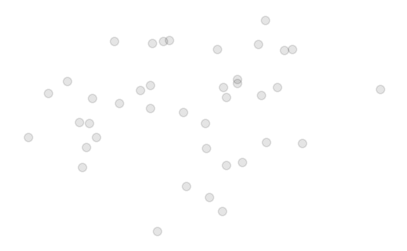

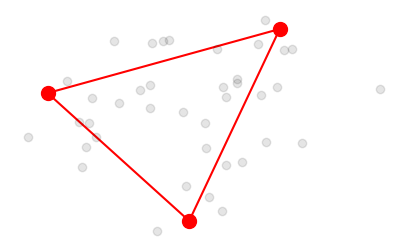

In [3]:
#| layout-ncol: 2
#| fig-cap: 
#|   - "Dataset"
#|   - "Archetypes"

fig = plt.figure(figsize=(5, 3))
plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(5, 3))
plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)
plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)

for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

plt.axis("off")
plt.show()


---

### Formal Definition

Let $\mathfrak{X}=\{\bm{x}^{(1)}, \bm{x}^{(2)}, \ldots, \bm{x}^{(N)}\}$ be a dataset where each $\bm{x}^{(n)} \in \mathbb{R}^M$.

**Objective**

Find some archetypes $\mathfrak{Z} = \{\bm{z}^{(1)}, \bm{z}^{(2)}, \ldots, \bm{z}^{(K)}\}$ where each $\bm{z}^{(k)} \in \mathbb{R}^M$, which are convex combinations of the data points in $\mathfrak{X}$.

---

Therefore, each archetype $\bm{Z}_k$, i.e. $\bm{z}^{(k)}$, can be represented as

$$ \bm{Z}_k = \sum_{n=1}^{N} \bm{{B}}_{k,n} \bm{X}_n $$

subject to $\|{\bm{{B}}_k}\|_1 = 1$ and $\bm{{B}}_{k,n} \in [0, 1]$.

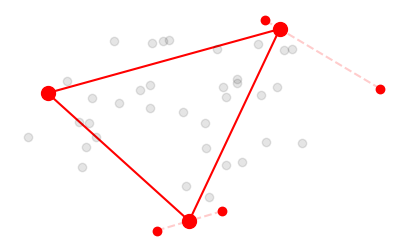

In [4]:
#| fig-cap: "Archetypes as convex combinations of the data"

fig = plt.figure(figsize=(5, 3))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

# plot points that generate the archetypes
index = np.where(aa.archetypes_similarity_degree_ > 0.1)

for i in index[1]:
    plt.scatter(data[i, 0], data[i, 1], c='r', zorder=50, alpha=1)

# plot a dashed line from data to archetypes
for i, j in zip(index[0], index[1]):
    plt.plot([data[j, 0], aa.archetypes_[i, 0]], [data[j, 1], aa.archetypes_[i, 1]], 'r--', zorder=5, alpha=0.2)

plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)
for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

# hide axes
plt.axis("off")

plt.show()


---

Simultaneously, each data point $\bm{X}_n$, i.e. $\bm{x}^{(n)}$, is then approximated as a convex combination of these archetypes
$$ \bm{X}_n \approx \sum_{k=1}^{K} \bm{{A}}_{n,k} \bm{Z}_k $$
similarly subject to $\|{\bm{{A}}_n}\|_1 = 1$ and $\bm{{A}}_{n,k} \in [0,1]$.

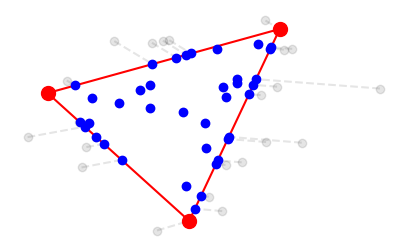

In [5]:
#| fig-cap: Data approximated as convex combinations of the archetypes

fig = plt.figure(figsize=(5, 3))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

plt.scatter(trans_data[:, 0], trans_data[:, 1], c='b', zorder=10, alpha=1)

# plot a dashed line from data to transformed data
for i in range(data.shape[0]):
    plt.plot([data[i, 0], trans_data[i, 0]], [data[i, 1], trans_data[i, 1]], 'k--', zorder=5, alpha=0.1)

plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)
for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

plt.axis("off")
plt.show()

---

This formulation thus involves two matrices of coefficients: $\bm{{B}}$ which defines the archetypes as combinations of the data points, and $\bm{{A}}$ which represents each data point as a mixture of archetypes.

In matrix notation, archetypal analysis can be expressed as:
$$ \bm{X} \approx \bm{A} \bm{Z} = \bm{A} (\bm{B} \bm{X})$$

---

### Computation

$$ \argmin_{\bm{A}, \bm{B}} \|{\bm{X} - \bm{A}\bm{B}\bm{X}}\|^2_F $$
where  $\|{\bm{{A}}_n}\|_1 = 1$, $\bm{{A}}_{n,k} \in [0, 1]$, $\|{\bm{B}_k}\|_1 = 1$ and $\bm{{B}}_{k,n} \in [0, 1]$.

**Steps**

1. Initialize archetypes
2. Loop until error reduction is sufficiently small:
    1. Approximate $\bm{X}$ as convex combinations of $\bm{Z}$, i.e. optimize $\bm{A}$.
    2. Update archetypes, i.e. $\bm{Z} = \bm{A}^{-1} \bm{X}$.
    3. Represent $\bm{Z}$ as convex combinations of $\bm{X}$, i.e. optimize $\bm{B}$.
    4. Update archetypes, i.e. $\bm{Z} = \bm{B}\bm{X}$.
    5. Compute error $\|{\bm{X} - \bm{A}\bm{B}\bm{X}}\|^2_F$.

---

#### Example

::: {.animation-center}

In [6]:
archetypes_comp = []
trans_data_comp = []
hull_comp = []
loss_comp = []

for i in range(1, 100):
    generator = np.random.RandomState(20)
    aa = AA(n_archetypes=3, max_iter=i, tol=0,
            method='nnls',
            # method_kwargs={'max_iter_optimizer': 10_000, 'const': 10},
            init='uniform',
            save_init=True,
            random_state=generator)

    _ = aa.fit(data)

    archetypes_comp.append(aa.archetypes_)
    trans_data_comp.append(aa.transform(data) @ aa.archetypes_)
    hull_comp.append(ConvexHull(aa.archetypes_))
    loss_comp.append(aa.loss_[-1])
    

In [7]:
# #| fig-cap: Example of the archetypes computation

import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(7, 4))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

scat_trans = plt.scatter(trans_data_comp[0][:, 0], trans_data_comp[0][:, 1], c='b', zorder=10, alpha=1)
line_trans = []
for i in range(data.shape[0]):
    l_t = plt.plot([data[i, 0], trans_data_comp[0][i, 0]], [data[i, 1], trans_data_comp[0][i, 1]], 'k--', zorder=5, alpha=0.1)
    line_trans.append(l_t[0])

scat_arch = plt.scatter(archetypes_comp[0][:, 0], archetypes_comp[0][:, 1], c='r', s=100, zorder=20)
line_arch = []

for simplex in hull_comp[0].simplices:
    l_a = plt.plot(archetypes_comp[0][simplex, 0], archetypes_comp[0][simplex, 1], 'r-')
    line_arch.append(l_a[0])

ann_step = plt.annotate(f"Step: {0}\nLoss: {loss_comp[0]:.2f}", [0.1, 0.9], xycoords='subfigure fraction')

def update(frame):
    scat_trans.set_offsets(trans_data_comp[frame])
    for i in range(data.shape[0]):
        line_trans[i].set_xdata([data[i, 0], trans_data_comp[frame][i, 0]])
        line_trans[i].set_ydata([data[i, 1], trans_data_comp[frame][i, 1]])

    scat_arch.set_offsets(archetypes_comp[frame])
    for i, simplex in enumerate(hull_comp[frame].simplices):
        line_arch[i].set_xdata(archetypes_comp[frame][simplex, 0])
        line_arch[i].set_ydata(archetypes_comp[frame][simplex, 1])

    ann_step.set_text(f"Step {frame}\nLoss: {loss_comp[frame]:.2f}")
    
    return (scat_trans, line_trans, scat_arch, line_arch, ann_step)


ani = animation.FuncAnimation(fig=fig, func=update, frames=60)

plt.axis("off")
plt.tight_layout()
plt.close()
plt.rcParams["animation.html"] = "jshtml"
ani

:::

---

### Selecting the optimal number of archetypes

- Achieving a balance between complexity and elucidation of data patterns is crucial.
- Archetypes are not necessarily nested; they can change as $K$ increases to better capture data structure.
- The Elbow Method is a preferred approach due to its simplicity and intuitive visual clarity.


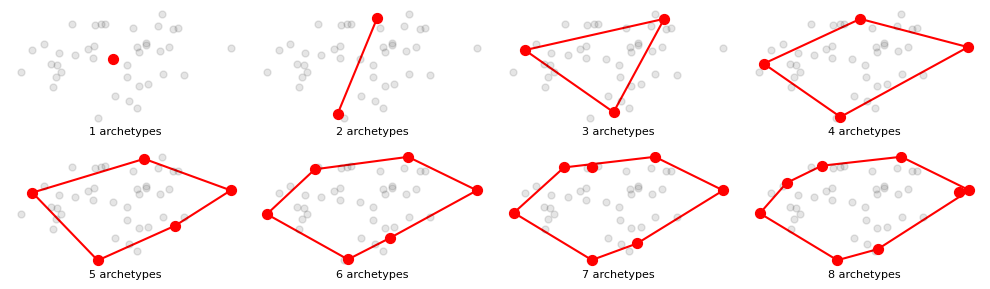

In [8]:
#| fig-cap: Archetyal analysis using different number of archetypes

fig, ax = plt.subplots(2, 4, figsize=(10, 3))
axs = ax.flatten()
elbow_models = []
for k in range(1, 9):
    generator = np.random.RandomState(23)
    aa = AA(n_archetypes=k, max_iter=200, tol=0,
            method='pgd',
            method_kwargs={'max_iter_optimizer': 10, 'beta': 0.88},
            init='uniform',
            save_init=False,
            random_state=generator)

    _ = aa.fit(data)

    elbow_models.append(aa)
    
    axs[k-1].scatter(data[:, 0], data[:, 1], zorder=10, s=25, marker='o', c='k', alpha=0.1)
    axs[k-1].scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=50, zorder=20)

    if k == 2:
            axs[k-1].plot([aa.archetypes_[0, 0], aa.archetypes_[1, 0]], [aa.archetypes_[0, 1], aa.archetypes_[1, 1]], 'r-')
    if k > 2:
        hull_k = ConvexHull(aa.archetypes_)
        
        for simplex in hull_k.simplices:
            axs[k-1].plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')
    axs[k-1].annotate(f"{k} archetypes", [0.5, -0.1], xycoords="axes fraction", horizontalalignment="center", fontsize="8")
    axs[k-1].axis("off")
fig.set_tight_layout(True)

---

#### The Elbow Method

1. Plot performance metric (variance explained or reconstruction error) vs. number of archetypes.
2. Identify the "elbow" where marginal gains diminish.
3. The elbow indicates the optimal number of archetypes.

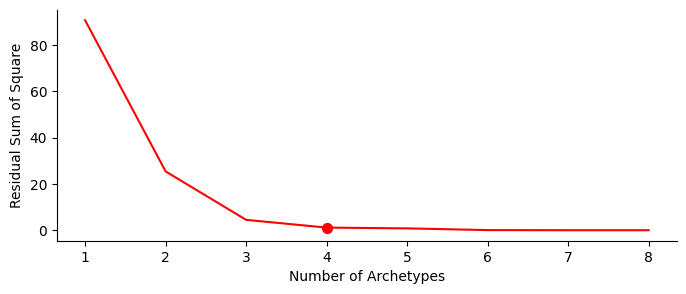

In [9]:
#| fig-cap: Elbow method for previous example

rss = [model.loss_[-1] for model in elbow_models]
arch = [model.n_archetypes for model in elbow_models]

fig, ax = plt.subplots(1, 1, figsize=(8, 3))

plt.plot(arch, rss, c="r")

plt.scatter([arch[3]], [rss[3]], s=50, c="r", zorder=10)

ax.spines[['right', 'top']].set_visible(False)

ax.set_ylabel("Residual Sum of Square")
ax.set_xlabel("Number of Archetypes")
plt.show()

## Archetypoid Analysis (ADA)

- Introduced by Vinué, Epifanio and Alemany in 2015.
- Identifies real data points (archetypoids) as representatives, not convex combinations.
- Easier to understand results since archetypoids are actual data points.
- Ideal for scenarios where interpretability and real-world relevance are crucial. E.g. Countries.


---

### Formal Definition

Let $\mathfrak{X}=\{\bm{x}^{(1)}, \bm{x}^{(2)}, \ldots, \bm{x}^{(N)}\}$ be a dataset where each $\bm{x}^{(n)} \in \mathbb{R}^M$.

**Objective**

Find some archetypoids $\mathfrak{Z} = \{\bm{z}^{(1)}, \bm{z}^{(2)}, \ldots, \bm{z}^{(K)}\}$ where each $\bm{z}^{(k)} \in \mathbb{R}^M$ are in $\mathfrak{X}$.

---

Therefore, each archetypoid $\bm{Z}_k$, i.e. $\bm{z}^{(k)}$, can be represented as

$$ \bm{Z}_k = \sum_{n=1}^{N} \bm{{B}}_{k,n} \bm{X}_n $$

subject to $\|{\bm{{B}}_k}\|_1 = 1$ and $\bm{{B}}_{k,n} \in \{0, 1\}$, ensuring that each archetypoid is exactly represented
by one data point.

In [10]:
from archetypes import ADA

generator = np.random.RandomState(20)
aa = ADA(n_archetypes=3, max_iter=1_000, tol=0,
        method='nnls',
        method_kwargs={'max_iter_optimizer': 10_000, 'const': 10},
        init='furthest_sum',
        random_state=generator)

aa.fit(data)

trans_data = aa.transform(data) @ aa.archetypes_

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mlp

# plot convex hulls
from scipy.spatial import ConvexHull

hull = ConvexHull(aa.archetypes_)

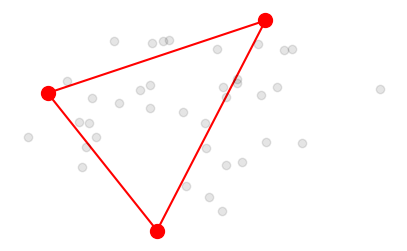

In [12]:
#| fig-cap: "Archetypoids as elements of the data"

fig = plt.figure(figsize=(5, 3))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

# plot points that generate the archetypes
index = np.where(aa.archetypes_similarity_degree_ > 0.1)

for i in index[1]:
    plt.scatter(data[i, 0], data[i, 1], c='r', zorder=50, alpha=1)

# plot a dashed line from data to archetypes
for i, j in zip(index[0], index[1]):
    plt.plot([data[j, 0], aa.archetypes_[i, 0]], [data[j, 1], aa.archetypes_[i, 1]], 'r--', zorder=5, alpha=0.2)

plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)
for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

# hide axes
plt.axis("off")

plt.show()


---

At the same time, each data point $\bm{X}_n$, i.e. $\bm{x}^{(n)}$, is then approximated as a convex combination of these archetypoids
$$ \bm{X}_n \approx \sum_{k=1}^{K} \bm{{A}}_{n,k} \bm{Z}_k $$
similarly subject to $\|{\bm{{A}}_n}\|_1 = 1$ and $\bm{{A}}_{n,k} \in [0,1]$.

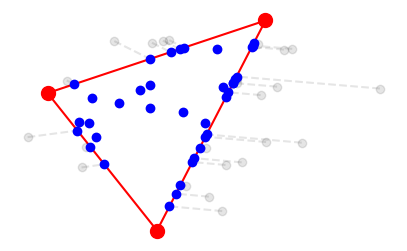

In [13]:
#| fig-cap: Data approximated as convex combinations of the archetypoids

fig = plt.figure(figsize=(5, 3))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

plt.scatter(trans_data[:, 0], trans_data[:, 1], c='b', zorder=10, alpha=1)

# plot a dashed line from data to transformed data
for i in range(data.shape[0]):
    plt.plot([data[i, 0], trans_data[i, 0]], [data[i, 1], trans_data[i, 1]], 'k--', zorder=5, alpha=0.1)

plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)
for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

plt.axis("off")
plt.show()

## Functional Archetypal analysis (FAA and FADA)

In this approach, each function $x^{(n)}(t)$ is expressed as a linear combination of a set of known basis functions $\mathfrak{J}(t) = \{j^{(1)}(t), j^{(2)}(t), \dots, j^{(M)}(t)\}$. The expression for each function is given by:
$$
x^{(n)}(t) = \sum_{m=1}^M \bm{C}_{n,m} j^{(m)}(t) = \bm{C}_n^\top \bm{J}(t)
$$
where $\bm{C}_n$ denotes the vector of coefficients of length $M$, and $\bm{J}(t)$ is the functional vector consisting of the basis functions.

---

Along with this, the minimization problem can be expressed (with the corresponding constraints for FAA and FADA) as:
$$\argmin_{\bm{A}, \bm{B}} \sum_{n_1=1}^N \|{\bm{C}_{n_1}^\top\bm{J}(t) - \sum_{k=1}^K \bm{A}_{n_1,k} \sum_{n_2=1}^N \bm{B}_{k,n_2} \bm{C}_{n_2}^\top \bm{J}(t)}\|^2$$

That can be simplified as
$$\argmin_{\bm{A}, \bm{B}} \sum_{n_1=1}^N {\bm{G}_{n_1}}^\top \bm{W} {\bm{G}_{n_1}}$$
where:

- $\bm{G}_{n_1} = \bm{C}_{n_1} - \sum_{k=1}^K \bm{A}_{n,k} \sum_{n_2=1}^N \bm{B}_{k,n_2} \bm{C}_{n_2}$
- $\bm{W}$ is the matrix containing the inner products of the pairs of basis functions.

---

In the case of an orthonormal basis such as Fourier, $\bm{W}$ simplifies to the order $M$ identity matrix, and FAA or FADA are effectively reduced to AA or ADA, respectively, of the basis coefficients.

In other cases, numerical integration may be required to evaluate $\bm{W}$, but once $\bm{W}$ is computed, no further numerical integrations are necessary.

---

#### Example

In [14]:
from skfda import datasets, FDataGrid
from skfda.misc.covariances import WhiteNoise
from skfda.representation.basis import FDataBasis, FourierBasis, BSplineBasis

n_samples = 50
n_features = 50
n_groups = 2
start = 0
stop = 1

t = np.linspace(start, stop, n_features)

m1 = t ** 1 * (1 - t) ** 5
m2 = t ** 4 * (1 - t) ** 2


groups = np.full(n_samples * n_groups, None)

for i in range(n_groups):
    groups[i * n_samples:(i+1) * n_samples] = f'Sample {i}'

sigma2 = 1e-6
shift = 5e-2
cov = WhiteNoise(variance=sigma2)

fd1 = datasets.make_gaussian_process(n_samples, mean=m1, cov=cov,
                            n_features=n_features, random_state=1, start=start,
                            stop=stop)

fd1.data_matrix += np.random.uniform(0, shift, n_samples)[:, np.newaxis, np.newaxis]

fd2 = datasets.make_gaussian_process(n_samples, mean=m2, cov=cov,
                            n_features=n_features, random_state=2, start=start,
                            stop=stop)

fd2.data_matrix += np.random.uniform(0, shift, n_samples)[:, np.newaxis, np.newaxis]

fd = FDataGrid(np.concatenate([fd1.data_matrix, fd2.data_matrix])[:, :, 0])

In [15]:
n_basis = 10
fourier_basis = FourierBasis(fd.domain_range, n_basis=n_basis)
fourier_fd = FDataBasis.from_data(fd.data_matrix[:, :], grid_points=fd.grid_points, basis=fourier_basis)

n_archetypes = 4
fourier_aa = AA(n_archetypes=n_archetypes, method="nnls", init="furthest_sum", random_state=1)
fourier_aa.fit(fourier_fd.coefficients)
fourier_arch = FDataBasis(basis=fourier_basis, coefficients=fourier_aa.archetypes_)


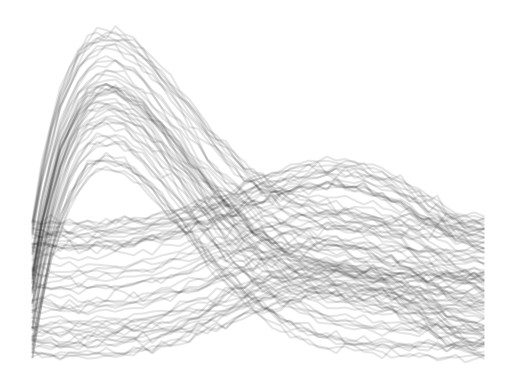

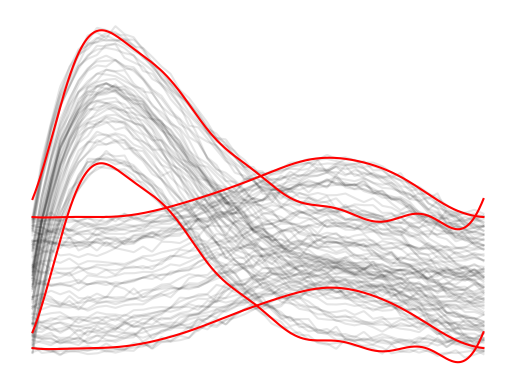

In [16]:
#| layout-ncol: 2
#| fig-cap: 
#|   - Functional dataset
#|   - Functional archetypes (using Fourier basis)

fig, ax = plt.subplots()
fd.plot(color="black", axes=ax, alpha=0.1)

plt.axis("off")
plt.show()

fig, ax = plt.subplots()
fd.plot(color="black", axes=ax, alpha=0.1)
fourier_arch.plot(axes=ax, color="red")
# bspline_arch.plot(axes=ax, color="green")
# monomial_arch.plot(axes=ax, color="red")

plt.axis("off")

plt.show()

# Contributions

---

### A data-driven classification of 3D foot types by archetypal shapes based on landmarks

::: aside
A data-driven classification of 3D foot types by archetypal shapes based on landmarks. Aleix Alcacer Sales, Irene Epifanio López, María Victoria Ibáñez Gual, Amelia Simó Vidal, Alfredo Ballester. PLOS ONE. Num. 1. Vol. 15. 2020.
:::


:::: {.columns}

::: {.column width="80%"}
#### Objectives

- Develop a data-driven methodology to classify 3D foot shapes into distinct types.
- Provide an objective and quantifiable approach to foot typology for enhanced footwear design.
:::

::: {.column width="20%"}
![](static/plosone/figura10.png){.r-stretch}
:::

::::

---

#### Data Collection
- 775 3D right foot scans (Spanish adult population).
- Each foot represented by 5626 3D landmarks.

![Example of the landmarks used in the study](static/plosone/figura12.png){.r-stretch}

---

#### Data Normalization
- Location Removal: Centered using the Helmert sub-matrix.
- Scale Normalization: Applied via Frobenius norm (centroid size).
- Rotation Removal: Obtained using the Procrustes algorithm.

![Three feet with the same shape.](static/plosone/pies1.png){.r-stretch}      

---

#### Results

- Process
   - Prject normalized foot scans onto the tangent space.
   - Apply ADA to identify extreme patterns (archetypoid shapes) from data.
   - Comapre results against traditional clustering techniques.

- Key Findings
   - The identification of three archetypoid foot shapes for both men and women.
   - Enhanced footwear design to accommodate a wider range of foot shapes.

![Archetypal foot shapes](static/plosone/fig9.png){.r-stretch}

---


### Combining Classification and User-Based Collaborative Filtering for Matching Footwear Size

::: aside
Combining classification and user-based collaborative filtering for matching footwear size. Aleix Alcacer Sales, Irene Epifanio López, Jorge Valero, Alfredo Ballester. MATHEMATICS. Num. 7. Vol. 9. 2021.
:::


#### Objectives

- Develop a hybrid approach combining classification methods and user-based collaborative filtering for accurate footwear size recommendation.
- Improve size prediction by integrating 3D foot measurements, user preferences, and past purchases, improving both accuracy and user satisfaction in online footwear purchases.


---

#### Data Collection
   - 36 right foot scans from Spanish men using a low-cost 3D foot digitizer (DomeScan).
   - Features
      - Foot Measurements: Includes variables like Foot Length (FL), Ball Width (BW), and Instep Height (IH).
      - User Preference: Estimation whether the user prefers a tight, normal, or loose fit.
      - Past Purchases: Historical data on footwear size and user satisfaction.
      - Missing Data: 29% of past purchases had missing size information.

---

#### Proposed methods

- CO-methods: CF (imputing missing data) -> POLR (imputed + complete data).
- EN-methods: CF (regression, missing data) + POLR (complete data)

![Overview of the recommended system framework](static/mathematics/graph.jpg){.r-stretch}

---

#### Results
   - Tested on real data and simulated scenarios to assess performance across different conditions.
   
![Comparison of the performance of the proposed models for a synthetic scenario](static/mathematics/table.png){.r-stretch}

- Key Findings
   - Some methods based on clustering and archetype analysis are used for the first time as user-based collaborative filtering and these in imputing missing data.
   - The proposed ensembled models outperforms individual classifiers.

::: {.notes}
   - Improved size recommendation can significantly reduce returns due to size mismatch, enhancing customer satisfaction in online footwear retail.
:::


---


### Ordinal Classification for Interval-Valued Data and Interval-Valued Functional Data

::: aside
Ordinal classification for interval-valued data and interval-valued functional data. Aleix Alcacer Sales, Marina Martínez García, Irene Epifanio López. EXPERT SYSTEMS WITH APPLICATIONS. Vol. 238. pp. 1-11. 2024.
:::

#### Objectives
- Introduce and compare methods for ordinal classification using interval-valued data (IVD) and interval-valued functional data (IVF).
- Assess the impact of considering both order and interval nature in classification performance.
- Provide an extensive comparison with naïve approaches that do not account for ordering or interval nature.

---

#### Proposed Methods
- FH + LDA-ID: Combines Frank and Hall's method with Linear Discriminant Analysis for Interval Data.
- DI + $wkNN$: Weighted k-Nearest-Neighbor using distance-based measures for IVD and IVF.
- KPCA + POLR: Kernel Principal Component Analysis followed by Proportional Odds Logistic Regression.
- KIOF: Kernel-induced Ordinal Forest, extending Kernel-induced Random Forest to ordinal classification.
- POLR-I & POLR-I2: Extensions of POLR using interval bounds separately.

---

#### Data & Evaluation
- Simulated Data: Synthetic datasets with 3 and 4 ordered classes.

- Real-World Data: Applications on global development indices and meteorological data from Catalonia.

::: {.columns}
::: {.column width="39.75%"}
![Meteorological data from Catalonia](static/interval/stations.png)
:::

::: {.column width="60.25%"}
![Temperature and humidity data from multiple stations](static/interval/temp-hum.png)
:::
:::

---

#### Results

- Performance Metrics: Accuracy, precision, recall, and F1 score across 50 different train-test splits.

- Key Findings
  - KIOF (also DI + $wkNN$ and KPCA + POLR) consistently delivers the best performance across different datasets.
  - The inclusion of interval information and ordinal structure improves classification accuracy.
  
![Accuracy of the proposed methods on meteorological data](static/interval/results.png){.r-stretch}

---

### Comparative Insights: Fuzzy Clustering vs. Archetypal Analysis in Vector Quantization for Data Compression

::: aside
This work has been carried out within the framework of the "Doctorat Industrial" program at Universitat Jaume I.
:::

#### Objectives
- Compare the performance of Fuzzy Clustering and Archetypal Analysis in data compression.
- Evaluate the effectiveness of these methods within the *Blosc2* framework for compressing large datasets, focusing on image data.

---

#### Data Compression Framework

- Blosc2
  - Chunking: Splits data into chunks optimized for processor cache, speeding up compression and decompression.
  - Multidimensional: Supports multidimensional containers for efficient data access.
  - Multiple Codecs and Filters: Allows the use of various codecs and filters for better compression and customization.

- Quantization Methods
  - Fuzzy Clustering: Assigns data points to groups based on their centroids.
  - Archetypal Analysis: Identifies archetypes and represents the data as combinations of these archetypes.

---

#### Workflow

- New codecs developed for *Blosc2*, using both methods to generate codebooks during preprocessing.

![Workflow of the data compression framework](static/blosc/workflow.png){.r-stretch}

---

#### Results
- Compression applied to the *Olivetti faces dataset* to evaluate explained variability and data reconstruction.

![Comparison of the explained variability between Fuzzy Clustering and Archetypal Analysis](static/blosc/compression_faces.png){.r-stretch}

- Key Findings
  - A plugin machinery for *Blosc2* was developed to integrate Archetypal Analysis for data compression.
  - Archetypal Analysis achieves higher explained variability (98.89%) compared to Fuzzy Clustering (80.31%) while maintaining the same compression ratio.
---

### Outlier Detection of Clustered Functional Data with Image Processing Applications by Archetype Analysis

::: aside

Outlier Detection of Clustered Functional Data with Image Processing Applications by Archetype Analysis. Aleix Alcacer Sales, Irene Epifanio López. Accepted for publication in PLOS ONE. 

:::

#### Objectives

::: {.columns}

::: {.column width="65%"}
- Develop a methodology for detecting outliers in clustered functional data, a situation in which previous methods have shown limitations as it is really challenging.
- Extend the *AA + kNN* technique to handle multivariate and multi-argument functions.
- Apply the method to real-world image and signal processing tasks.
:::

::: {.column width="35%"}
![Clustered functional data](static/outliers/dataset.png)
:::

:::

---

#### FAA + kNN Algorithm

- Projection with FAA 
  - Functional Archetypal Analysis (FAA) projects data into multiple subspaces identifying extreme points.

- k-Nearest Neighbors (kNN) 
  - For each archetypal subspace and for multiple $k$ values, calculates distances to detect distant points as potential outliers.

- Averaging Outlier Scores   
   - Outlier scores from all projections are averaged (along $k$) to improve robustness and reduce variance.

---

#### Results

- Tested on simulated data and real-world tasks such as aircraft shapes analysis and electrocardiogram (ECG) analysis.



![ECG analysis example](static/outliers/outliers-2.png){.r-stretch}


- Key Findings
   - The FAA + kNN approach outperforms existing methods, especially in detecting outliers within clustered data.
   - Achieved high accuracy in both simulated and real-world datasets.

---


### Biarchetype Analysis: Simultaneous Learning of Observations and Features Based on Extremes

::: aside
Biarchetype Analysis: Simultaneous Learning of Observations and Features Based on Extremes. Aleix Alcacer, Irene Epifanio, Ximo Gual-Arnau. IEEE Transactions on Pattern Analysis and Machine Intelligence. 2024.
:::

#### Objectives
- Introduce Biarchetype Analysis (biAA) to identify archetypes in both rows (observations) and columns (features) simultaneously.
- Provide a more interpretable alternative to biclustering, focusing on extreme values in data for better insight.

---

#### Model framework
- Extend Archetype Analysis (AA) to obtain arcehtypes in both observations and features.
- Despite being similar to biclustering, biAA focuses on archetypes instead of centroids, providing more interpretable results.

![Biarchetype Analysis framework](static/biaa/scheme.png){width=60%}

---

#### Formal definition

In BiAA, biarchetypes  are defined by ${\bf Z} = {\bf {\bf B}} {\bf X} {\bf {\bf C}}$, i.e. the archetypes are mixture of the data points and variables. There are $k$ archetypes for rows and $c$ for columns.

Simultanously, the data points are approximated as a convex combination of these biarcehtypes, i.e. ${\bf X} \approx {\bf A} {\bf Z} {\bf D}$.

Therefore, the objective function can be expressed as:

$$
\argmin_{{\bf A}, {\bf B}, {\bf C}, {\bf D}} \left \| {\bf X} - {\bf {\bf A} {\bf B} X {\bf C} {\bf D}}\right \|^2_F
$$
where $\|{\bm{{A}}_n}\|_1 = 1$, $\bm{{A}}_{n,k} \in [0, 1]$, $\|{\bm{B}_k}\|_1 = 1$, $\bm{{B}}_{k,n} \in [0, 1]$, $\|{\bm{C}_c}\|_1 = 1$, $\bm{{C}}_{m,c} \in [0, 1]$, $\|{\bm{D}_m}\|_1 = 1$, $\bm{{D}}_{c, m} \in [0, 1]$.

---

#### Algorithm
- Initialization
   - Randomly initialize coefficient matrices.
- Alternating Optimization
   - Step 1: Optimize ${\bf A}$ and ${\bf D}$ as in AA.
   - Step 2: Recalculate biarchetypes.
   - Step 3: Optimize ${\bf B}$ and ${\bf C}$ as in AA.
- Convergence
   - Repeat the steps until the change in RSS becomes small or the maximum number of iterations is reached.

---

#### Results
- Tested on synthetic data and applied to real datasets in biology, document clustering, and community detection.

![Community detection example](static/biaa/enron-adjacency-matrix-sorted.png){.r-stretch}

- Key Findings
   - biAA improves interpretability by identifying extreme archetypes for both rows and columns.
   - It offers better performance than traditional biclustering in terms of capturing data extremes.

---

### Co-Clustering Through a New Prism: Comparing Biarchetypal Analysis and Stochastic Block Models


::: aside

Co-Clustering Through a New Prism: Comparing Biarchetypal Analysis and Stochastic Block Models. Aleix Alcacer, Morten Morup. Preprint. 2024.

This work has been carried out within the framework of the "Doctorat Internacional" program at Universitat Jaume I during my research stay at Denmark Technical University.

:::
#### Objectives
- Compare Biarchetypal Analysis (BiAA) with Stochastic Block Models (SBM) for co-clustering.
- Introduce hard assignment and degree correction to enhance co-clustering performance.
- Develop a new algorithm for BiAA, optimized for large datasets.
- Extend BiAA to handle $n$-dimensional data for complex, high-dimensional datasets.

---

#### Enhancements

- Scalable algorithm
   - Uses gradient-based optimization for faster processing of large datasets.

![Performance comparison between BiAA algorithms](static/coclust/performance_results.png){.r-stretch}

---

- Multi-dimensional datasets
   - Extended to n-dimensional data using tensor decomposition for more complex structures.

$$
    \argmin_{\mathcal{B}^{(1)}, \dots, \mathcal{B}^{(N)}, \mathcal{A}^{(1)},\dots, \mathcal{A}^{(N)}}  \left \|\left(\mathcal{X} - (\mathcal{X} \times_1 \mathcal{B}^{(1)} \dots \times_N \mathcal{B}^{(N)})\times_1\mathcal{A}^{(1)} \dots \times_N \mathcal{A}^{(N)}\right)\right \|^2_F
$$ 

subject to:

- $\sum_{k=1}^{K_n} \mathcal{A}^{(n)}_{ki} = 1$ with $\mathcal{A}^{(n)}_{ki} \in [0, 1]$ for each $i=1,\dots, I_n$ and $n=1,\dots,N$.
- $\sum_{i=1}^{I_n} \mathcal{B}^{(n)}_{ik} = 1$ with $\mathcal{B}^{(n)}_{ik} \in [0, 1]$ for each $k=1,\dots, K_n$ and $n=1,\dots,N$.

---

- Hard Assignment
   - Forces each element into a single archetype or community.

$$
\argmin_{{\bf A}, {\bf B}, {\bf C}, {\bf D}} \left \| {\bf X} - {\bf {\bf A} {\bf B} X {\bf C} {\bf D}}\right \|^2_F
$$

where

- $\|{\bm{{A}}_n}\|_1 = 1$, $\bm{{A}}_{n,k} \in \{0, 1\}$.
- $\|{\bm{B}_k}\|_1 = 1$, $\bm{{B}}_{k,n} \in [0, 1]$.
- $\|{\bm{C}_c}\|_1 = 1$, $\bm{{C}}_{m,c} \in [0, 1]$.
- $\|{\bm{D}_m}\|_1 = 1$, $\bm{{D}}_{c, m} \in \{0, 1\}$.
---

- Degree Correction
   - Adjusts for varying node degrees to improve co-clustering accuracy.

$$
\argmin_{{\bf a}, {\bf A}, {\bf B}, {\bf C}, {\bf D}, {\bf d}} \left \| {\bf X} - {\bf a \odot {\bf A} {\bf B} X {\bf C} {\bf D} \odot d} \right \|^2_F
$$
where

- $\|{\bm{{a}}}\|_1 = 1$, $\bm{{a}}_{n} \in [0, 1]$.
- $\|{\bm{{A}}_n}\|_1 = 1$, $\bm{{A}}_{n,k} \in \{0, 1\}$.
- $\|{\bm{B}_k}\|_1 = 1$, $\bm{{B}}_{k,n} \in [0, 1]$.
- $\|{\bm{C}_c}\|_1 = 1$, $\bm{{C}}_{m,c} \in [0, 1]$.
- $\|{\bm{D}_m}\|_1 = 1$, $\bm{{D}}_{c, m} \in \{0, 1\}$.
- $\|{\bm{{d}}}\|_1 = 1$, $\bm{{d}}_{m} \in [0, 1]$.

---

#### Results
- Synthetic datasets: Simulated data with varying community structures memberships and noise levels.

- Real-world datasets: Restaurants-Users, Drugs-Side Effects, Authors-Publications networks.

![Restaurant-Users network results](static/coclust/restaurants_boxplot.png){.r-stretch}


- Key Findings 
   - The new BiAA algorithm outperforms SBM, especially in detecting extremes and handling complex structures.
   - Degree correction and soft assignment improve clustering accuracy.

---

### `archetypes`: A Python package for archetypal analysis

::: aside

[https://archetypes.readthedocs.io/](https://archetypes.readthedocs.io/)

:::

`archetypes` is a Python package offering a user-friendly and efficient implementation of state-of-the-art techniques for Archetypal Analysis (AA).

- Implements multiple archetype initialization algorithms.
- Supports a variety of AA algorithms.
- Provides multiple backends, including numpy, jax, and torch.
- Runs seamlessly on both CPU and GPU.
- Integrates diverse visualization tools for enhanced result interpretation.
- Fully open-source and community-driven project.


# Conclusions

---

## Key Contributions

- 3D Foot Shape Classification
   - Implemented ADA for 3D foot classification using landmarks.
   - Identified three archetypal foot types in the Spanish population.

- Footwear Sizing
   - Integrated data from 3D digitizers, purchases, and self-reported sizes.
   - Developed new CF-methods and EN-methods.

- Ordinal Classification
   - Explored ordinal classification with interval-valued data.
   - Identified ensemble methods as top-performing methods.

---

- Data Compression with Blosc2
   - Compared AA with Fuzzy Clustering in Blosc2 codecs.
   - AA outperformed Fuzzy Clustering in data compression, preserving details better.

- Outlier Detection
   - Introduced a new method for outlier detection in clustered functional data.
   - Outperformed existing methods in identifying outliers.

- Biarchetypal Analysis
   - Developed BiAA, offering more interpretable results than biclustering.

- BiAA vs. SBM
   - New algorithm and small enhancements for BiAA.
   - Extended BiAA for n-dimensional datasets using a new algorithm.

- Python Package
   - Released `archetypes`, a Python package for Archetypal Analysis algorithms, enabling broader application.

---

## Future Work

- Propose BiAA for missing or incomplete data and apply it to collaborative filtering.
- Define and apply BiAA with functional data.
- Develop non-linear BiAA methodologies through kernelization or deep learning.
- Propose methodologies for robust BiAA.
- Detect and visualize outliers in high-dimensional functional data using archetype-based methods, with applications in neuroimaging.
- Extend BiAA to nominal and ordinal data by defining biarchetypoid analysis and applying it to educational data.
- Propose methodologies for regularized and fair archetypal analysis.

---


### Questions?


![](static//thank-you.png){.r-stretch style="display: block; margin: 0 auto" }
 

